# Clustering
In this exercise you will be using clustering methods on a sequence of human poses.
You will work with the poses data, which was used for the exercises in week 6
 and week 9
.The dataset contains 1403 pose sequences. Each sequence is a 100-frames time series capturing human poses. Each pose consists of 25 skeletal joints, where each joint is defined by an x and y coordinate ($25*2$). The dataset has a shape of $(1403, 100, 25*2)$. For this exercise, you will use a single pose sequence of 100 frames and apply clustering to the sequence. 
The following cells import libraries and provide functions for plotting the poses:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


# Suppress the specific warning
warnings.filterwarnings("ignore")

In [2]:
def limb_number_plot(s_pose_x,s_pose_y,n1,n2,c="red",label=None):
  if label is not None:
    if (s_pose_x[n1]>0) and (s_pose_x[n2]>0) and (s_pose_y[n1]>0) and (s_pose_y[n2]>0): 
      plt.plot([s_pose_x[n1],s_pose_x[n2]], [s_pose_y[n1], s_pose_y[n2]],color = c, linestyle="-",label=label)
  else:
    if (s_pose_x[n1]>0) and (s_pose_y[n1]>0):
       plt.plot(s_pose_x[n1], s_pose_y[n1],'*',color = c,label=label)
    if (s_pose_x[n2]>0) and (s_pose_y[n2]>0):
       plt.plot(s_pose_x[n2], s_pose_y[n2],'*',color = c,label=label)
    if (s_pose_x[n1]>0) and (s_pose_x[n2]>0) and (s_pose_y[n1]>0) and (s_pose_y[n2]>0):
      plt.plot([s_pose_x[n1],s_pose_x[n2]], [s_pose_y[n1], s_pose_y[n2]],color = c, linestyle="-")

def plot_single_pose(s_pose,c = "darkgreen",label=None,ds='body_25',c_head = 'red',head = False):
    
    s_pose_x=s_pose[::2]
    s_pose_y=s_pose[1::2]
    #torso/body
    limb_number_plot(s_pose_x,s_pose_y,2,5,c)
    if label is not None:

        limb_number_plot(s_pose_x,s_pose_y,9,12,c,label)
    else:
        limb_number_plot(s_pose_x,s_pose_y,9,12,c)
    limb_number_plot(s_pose_x,s_pose_y,2,9,c)
    limb_number_plot(s_pose_x,s_pose_y,5,12,c)

    #left arm (person facing away)
    limb_number_plot(s_pose_x,s_pose_y,2,3,c)
    limb_number_plot(s_pose_x,s_pose_y,3,4,c)

    #right arm
    limb_number_plot(s_pose_x,s_pose_y,5,6,c)
    limb_number_plot(s_pose_x,s_pose_y,6,7,c)

    #left leg / foot
    limb_number_plot(s_pose_x,s_pose_y,9,10,c)
    limb_number_plot(s_pose_x,s_pose_y,10,11,c)
    limb_number_plot(s_pose_x,s_pose_y,11,22,c)
    #right leg / foot
    limb_number_plot(s_pose_x,s_pose_y,12,13,c)
    limb_number_plot(s_pose_x,s_pose_y,13,14,c)
    limb_number_plot(s_pose_x,s_pose_y,14,19,c)

    # head
    if head:
        limb_number_plot(s_pose_x,s_pose_y,0,15,c)
        limb_number_plot(s_pose_x,s_pose_y,0,16,c)

        limb_number_plot(s_pose_x,s_pose_y,15,17,c)
        limb_number_plot(s_pose_x,s_pose_y,16,18,c)
    return True 

def plot_single_sequence(poses, pose_name='Poses',color='blue'):
    """
    Plots a single sequence of skeleton joints.

    Parameters:
        poses (array-like): Skeleton sequence data, shape (T,D).
        poses_name (string, optional): subtitle of each skeleton body in the sequence. 
        color (string, optional): color of skeleton bodies. 
    """
    plt.style.use('seaborn')
    plt.figure(figsize=(25,15))
    plt.title('Ground truth')

    for i in range(len(poses)):
        plt.subplot(10, 10, i + 1)
        plot_single_pose(poses[i], c=color, head=False)
        plt.ylim(1, 0)
        plt.xlim(-1, 1)
        plt.title(pose_name + str(i))
        plt.axis('off')

    plt.show()

In the cell below we load the dataset, reshape it and extract a single pose sequence. Feel free to change the pose sequence used, just keep in mind that it will lead to different results than the one showed in the outputs. 


In [3]:
data = np.load('poses_norm.npy')
N,T,D,C = data.shape
reshaped_data = data.reshape(N,T,D*C)
sequence = reshaped_data[191]
print(sequence.shape)

(100, 50)


## K-means Clustering
In this  exercise you will use k-means clustering on a pose sequence. 

---
**Task 1 (easy): Fitting the algorithm👩‍💻**
1. The cell below creates an instance of the `KMeans`
 class with 3 clusters. Use the k-means algorithm to find clusters in the sequence.


---

In [130]:
# Create KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans = KMeans(n_clusters=15, random_state=42)
# kmeans = KMeans(n_clusters=8, random_state=42)

# Write your solution here
model = kmeans.fit(sequence)


---
**Task 2 (easy): K-means clustering visualization👩‍💻**
1. Extract the cluster labels for each pose in the sequence. Use the [documentation on the `labels_`
 attribute.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


2. Visualize the pose sequence by assigning a distinct color to each pose based on which cluster it belongs to.



**Hint**
Use the `plot_single_pose`
 function or modify the `plot_single_sequence`
 function.


---

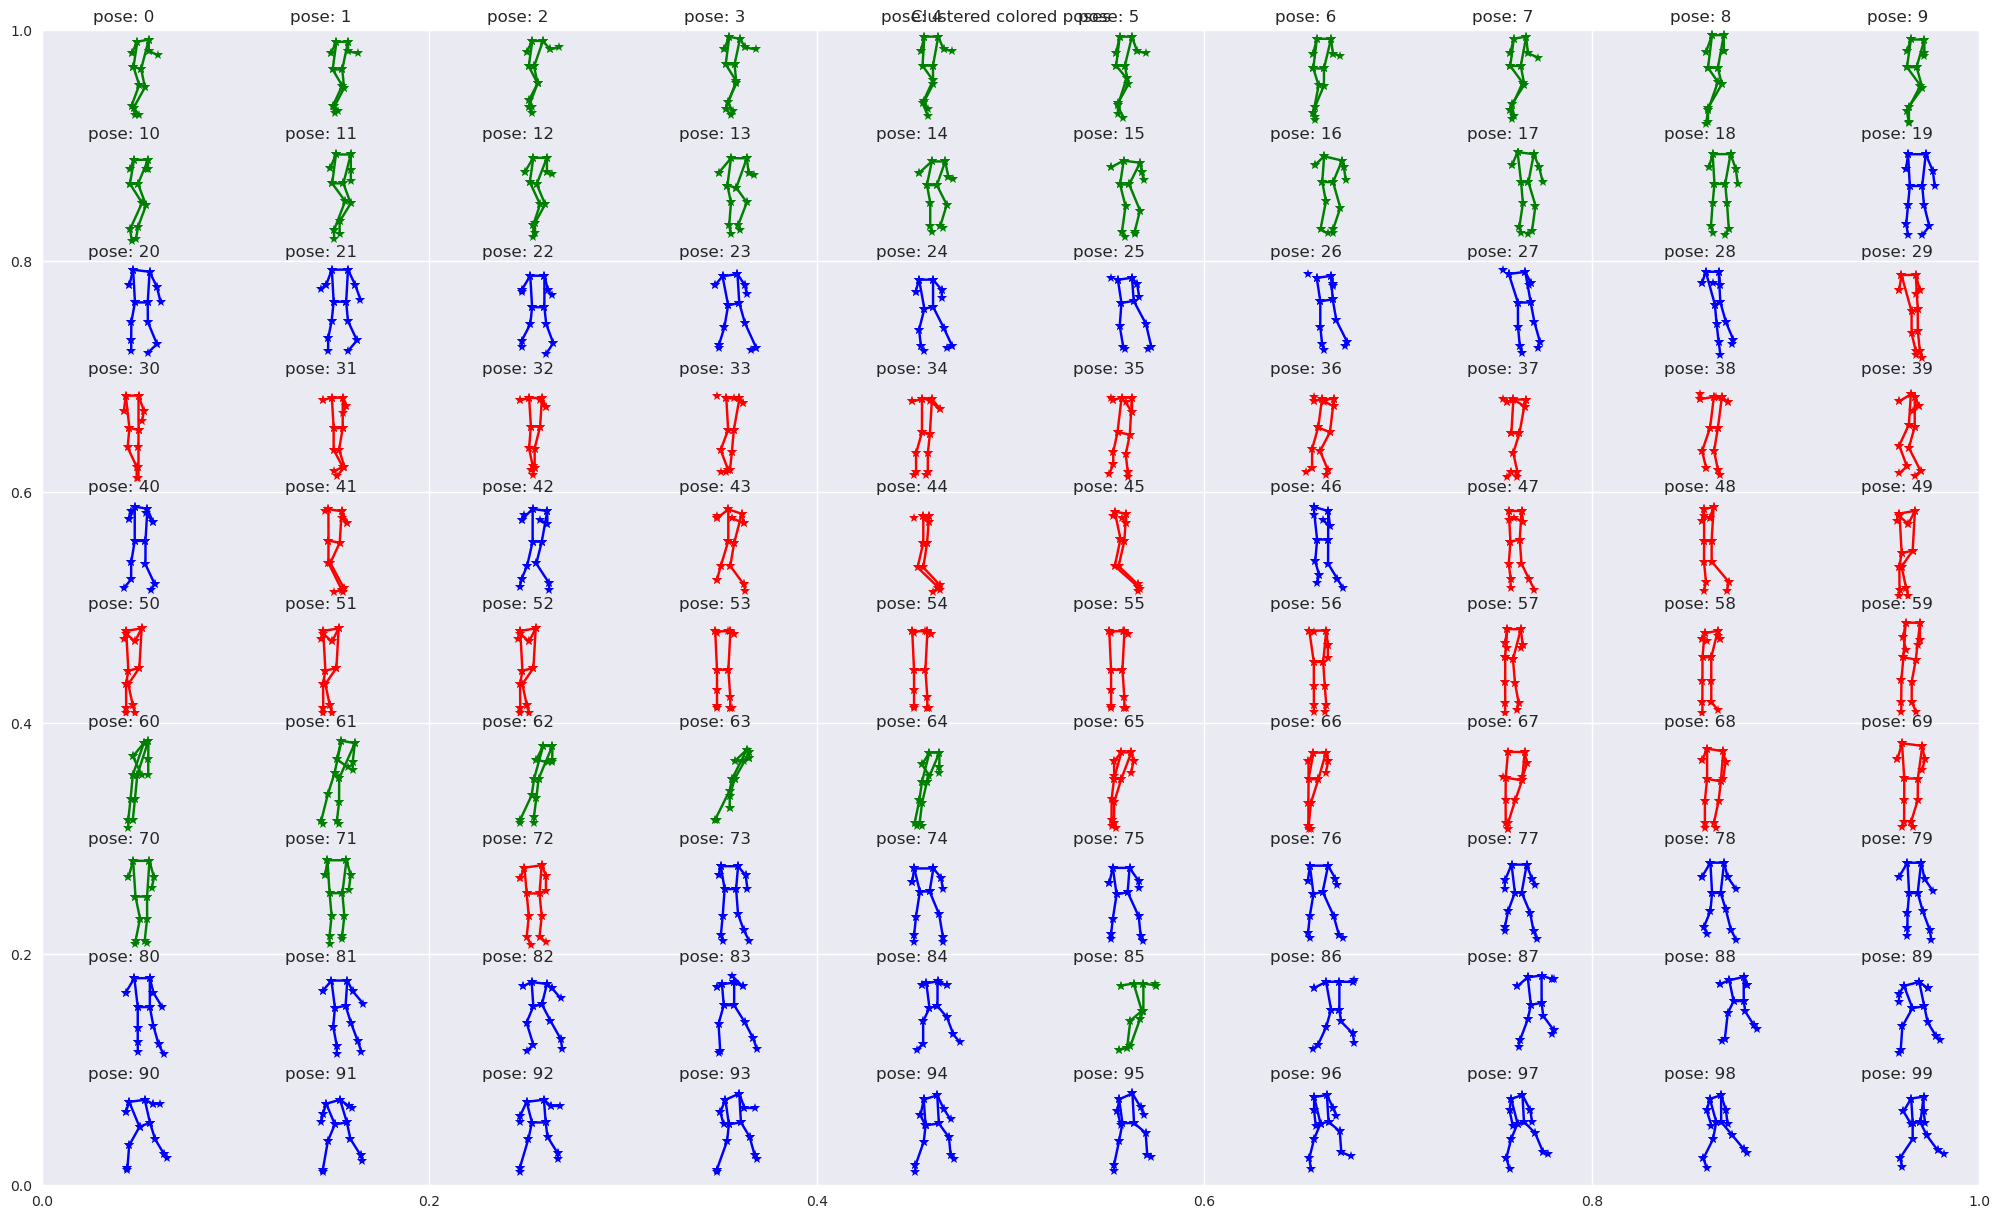

In [131]:
labels = model.labels_

colors = ['red','blue','green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'darkgreen', 'lightblue']

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(25,15))
plt.title('Clustered colored poses')
for i in range(len(labels)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.title(f'pose: {i}')
    plt.axis('off')

plt.show()



---
**Task 3 (easy): Cluster characteristics💡**
1. Identify the characteristics of the patterns in each cluster.

2. Extract and plot the cluster centers. What do these centers represent? Do the generated plots indicate that poses are grouped around distinct or specific movements?

3. (optional) Change the random state and fit the model again. Explain whether you obtain different groupings and why? 



---

1. The most consistent grouping seems to be dependent on where the pose is looking, considering the perspective of the pose, looking at the person sitting at the computer
    - When the pose looks to its right, it's a red cluster
    - When the pose looks to its left, it's a green cluster
    - When the pose looks straight, it's a blue color
2. The cluster centers do represent the above observation

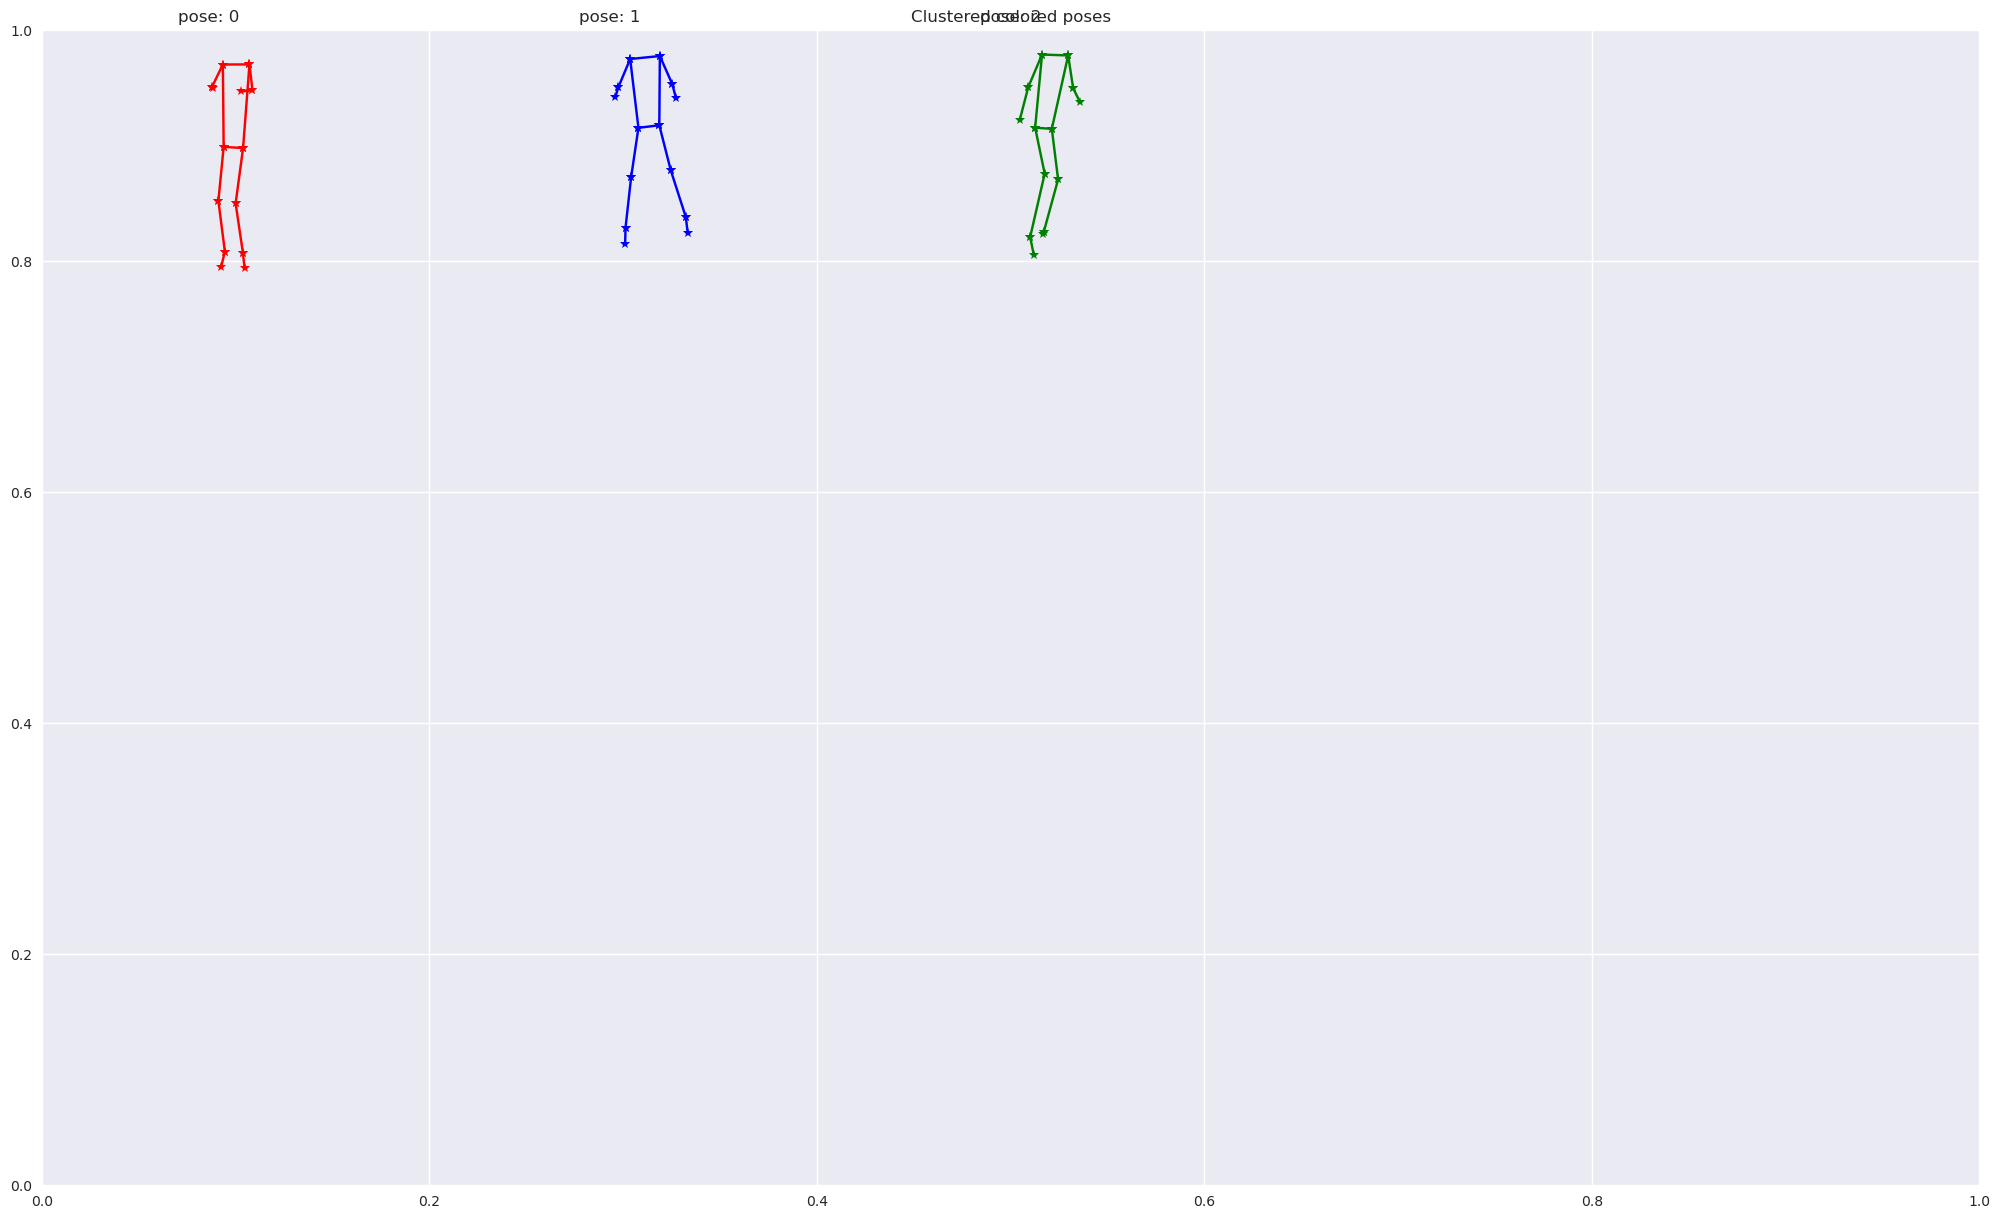

In [132]:
# write your relfection here
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(25,15))
plt.title('Clustered colored poses')
for i in range(model.n_clusters):
    plt.subplot(4, 5, i + 1)
    plot_single_pose(model.cluster_centers_[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.title(f'pose: {i}')
    plt.axis('off')

plt.show()


---
**Task 4 (medium): Elbow Method👩‍💻💡**
`k_range`
 below contains values for the number of clusters `k`
:
1. For each `k`
:
    - Apply k-means clustering to the sequence.

    - Extract the within-cluster sum of squares and store it in a list.



2. Plot the within cluster sum of squares as a function of the number of clusters (elbow curve) 

3. Determine visually the optimal number of clusters.

4. Revisit and run the previous tasks (tasks 1,2 and 3) with the optimal number of clusters. 

5. How does the elbow method influence the results in the previous tasks?



---

3. Somewhere in the range of 5 to 10 $k$, we see a change from an exponential decrease to something more linear (15 can maybe also be argued as the decrease is significant)
4. See tasks
5. With the higher number of we do see more essential poses captured, but going over the k count identified with the elbow method, the poses start to look at lot like each other

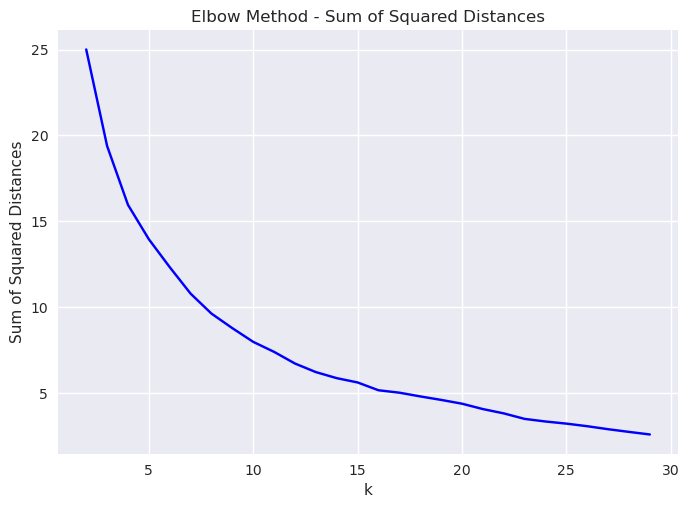

In [51]:
# Test multiple k values to find optimal k
k_range = range(2, 30)

# Write your solution here
# 1
sum_of_squared_distances = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    model = kmeans.fit(sequence)
    sum_of_squared_distances.append(model.inertia_)

# 2
plt.title('Elbow Method - Sum of Squared Distances')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.plot(k_range, sum_of_squared_distances, 'bx-')


## Mean-shift Clustering
In this exercise you will apply mean-shift clustering to the sequence of human poses. 

---
**Task 5 (easy): Fitting the mean-shift algorithm👩‍💻**
The cell below creates an instance of the `MeanShift()`
 class with a bandwith of 0.629.
1. Use the mean-shift algorithm to cluster the pose sequence.


---

In [136]:
# Create Mean-shift model
mean_shift = MeanShift(bandwidth=0.629) # original
# mean_shift = MeanShift(bandwidth=0.829)
# mean_shift = MeanShift(bandwidth=0.429)

# Write your solution here
mean_shift_model = mean_shift.fit(sequence)


---
**Task 6 (easy): Visualizing clusters👩‍💻**
1. Extract the cluster labels for each pose in the sequence. Use the [documentation on mean-shift clustering.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

2. Visualize the pose sequence, assigning a distinct color to each pose based on its cluster.
3. Extract and plot the cluster centers.


---

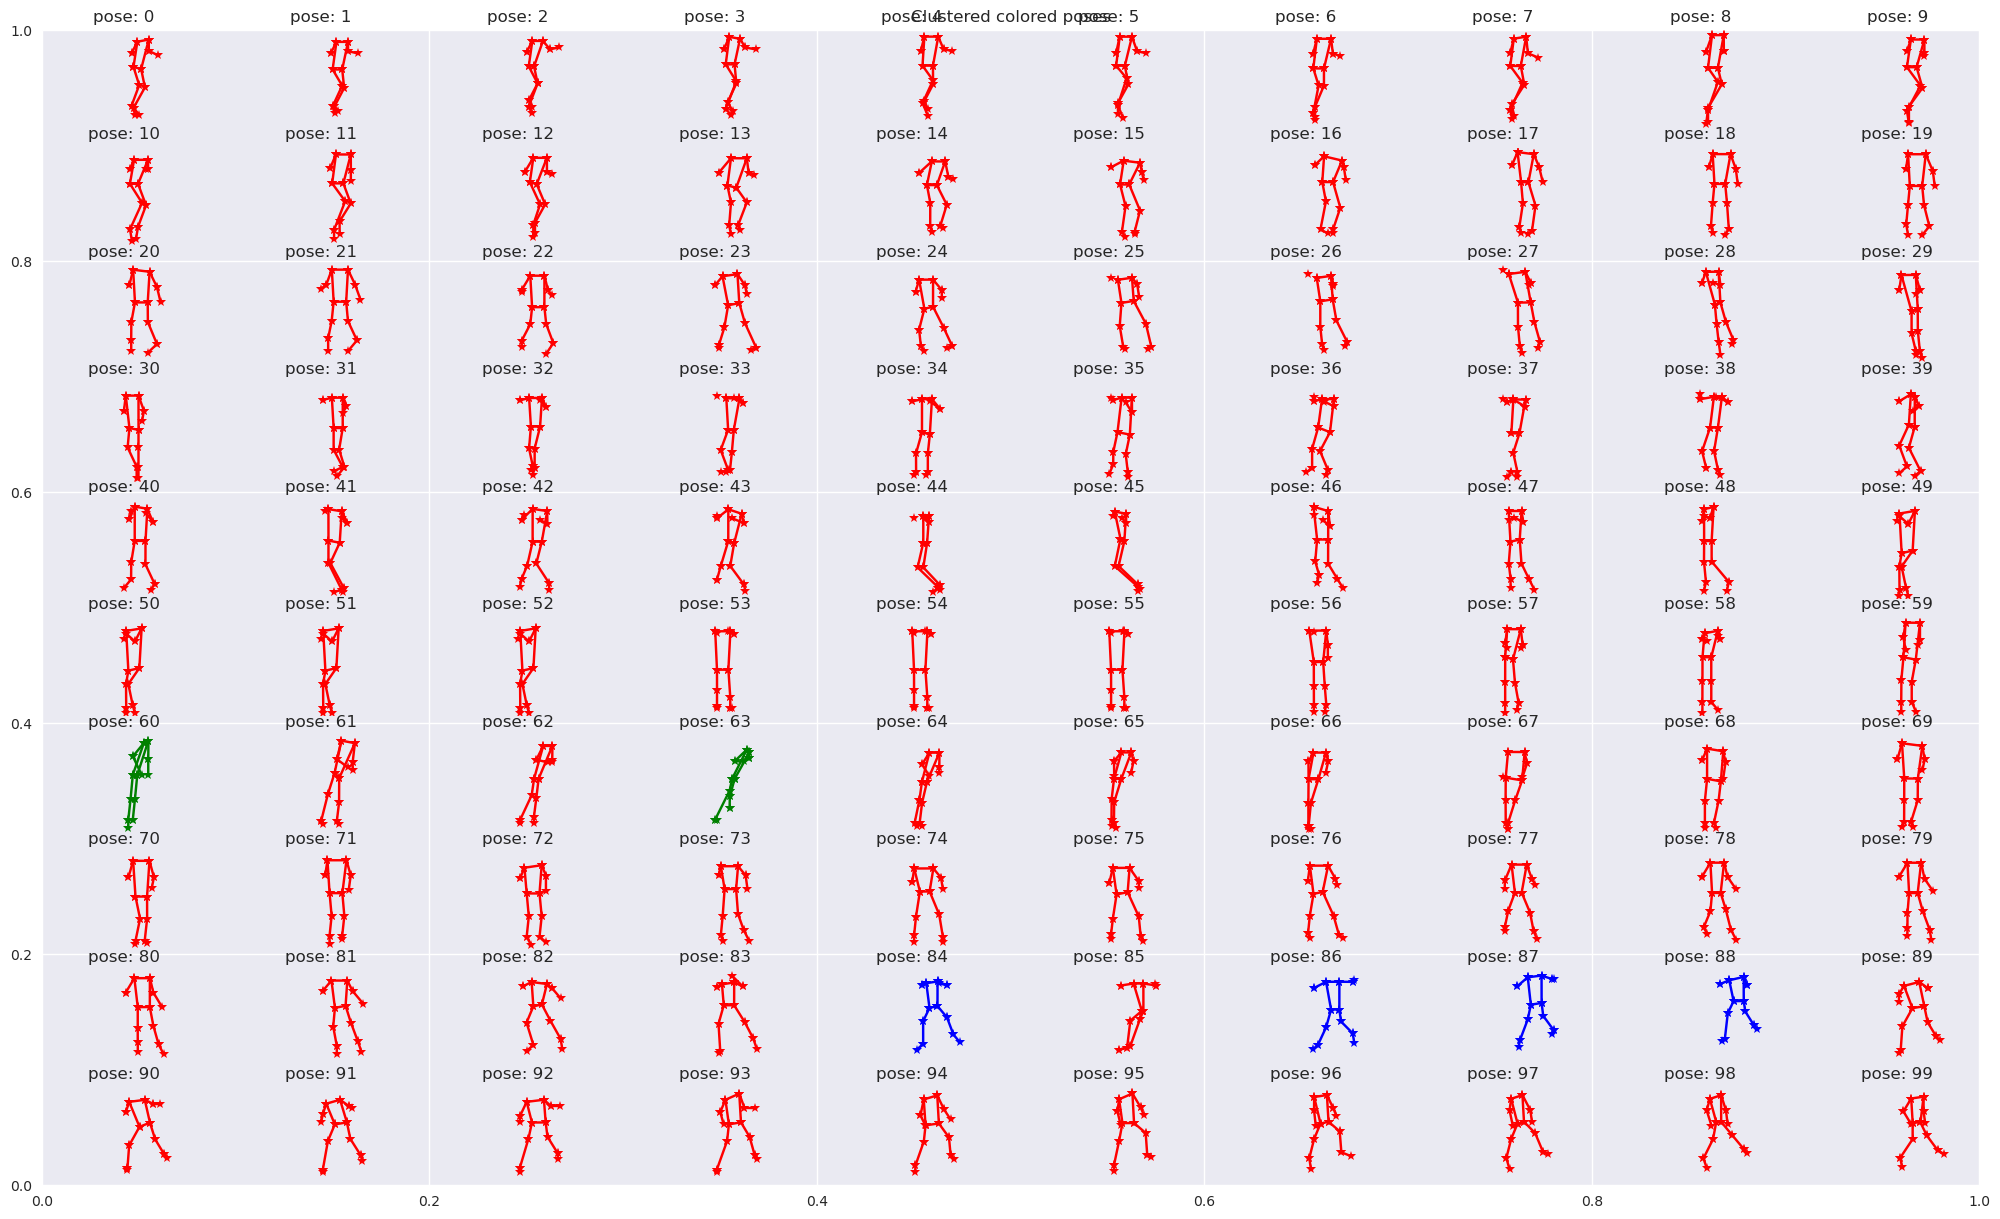

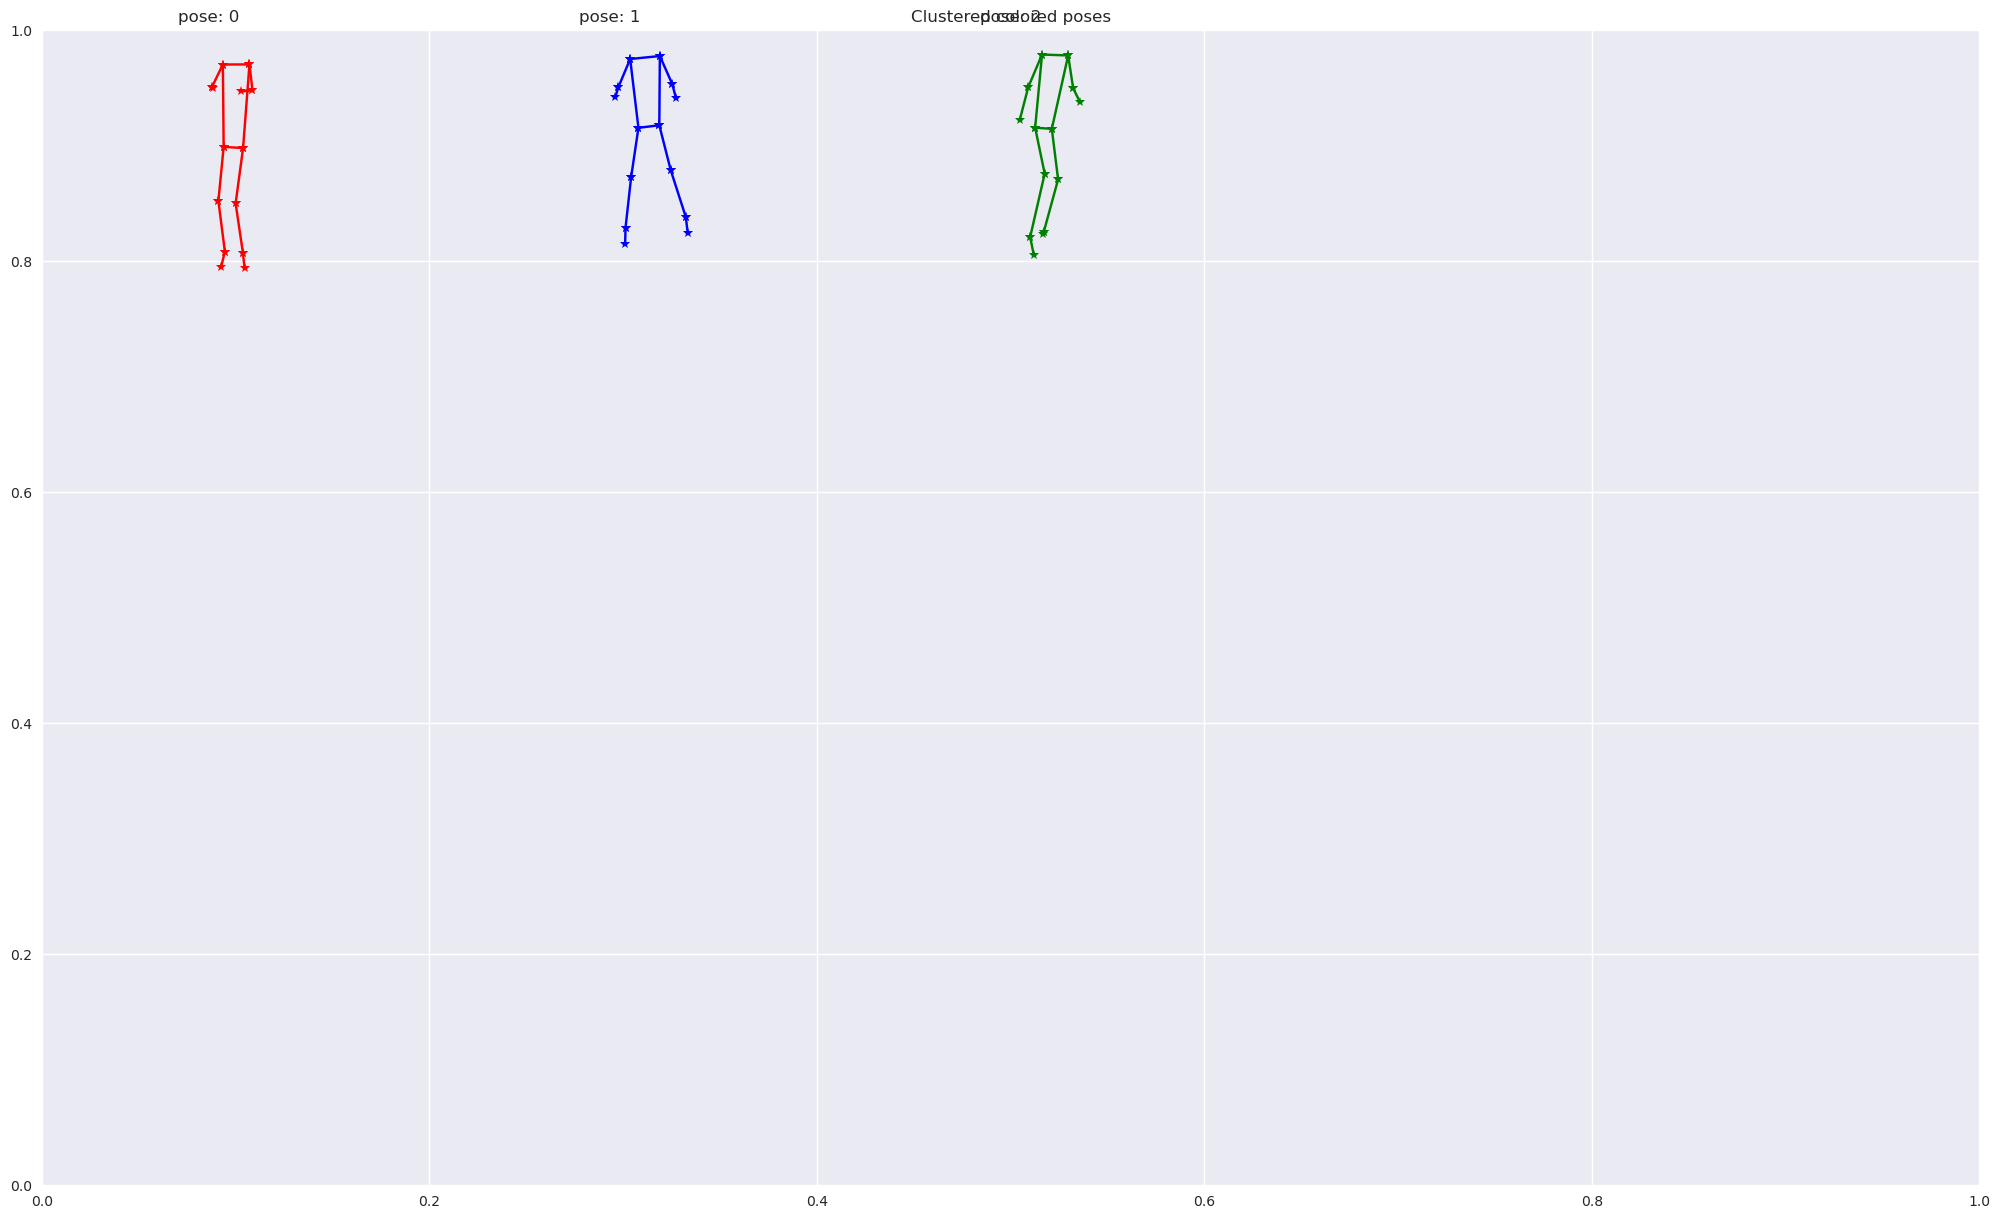

In [137]:
# Write your solution here
# 1
labels = mean_shift_model.labels_

# 2
colors = ['red','blue','green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'darkgreen', 'lightblue']

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(25,15))
plt.title('Clustered colored poses')
for i in range(len(labels)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.title(f'pose: {i}')
    plt.axis('off')

plt.show()

# 3
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(25,15))
plt.title('Clustered colored poses')
for i in range(mean_shift_model.cluster_centers_.shape[0]):
    plt.subplot(4, 5, i + 1)
    plot_single_pose(model.cluster_centers_[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.title(f'pose: {i}')
    plt.axis('off')

plt.show()


---
**Task 7 (easy): Reflection and the bandwith parameter👩‍💻💡**
1. Based on the previously generated plots what are the characteristics of the clusters?
2. What is the impact of decreasing and increasing the bandwidth parameter by 0.2 (0.829 / 0.429) and why?


**Info**
You might encounter longer completion times for lower bandwith values.


---

1. We see that Mean-Shift identifies 3 clusters with the same characteristics as in Task 3
2. Lowering the bandwidth creates more clusters (0.429 --> 7 clusters), as their "size" becomes smaller and vice versa with increasing the bandwidth (0.829 --> 2 clusters)

## Agglomerative Clustering
In this exercise, you will use hierarchical clustering on the human poses dataset using agglomerative clustering.

---
**Task 8 (easy): Dendrograms👩‍💻💡**
The cell below uses the [`linkage`
 function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
 to consturct the linkage matrix, which encodes the hierarchical clusters. 
1. Use the linkage matrix and the [documentation on `dendrograms`
](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)
 to generate a dendrogram.
2. How many clusters would result from setting the distance threshold to: 0.5, 1.5, 3.0, 4?


---

Number of clusters with a threshold of 0.5 is: 27
Number of clusters with a threshold of 1.5 is: 8
Number of clusters with a threshold of 3.0 is: 3
Number of clusters with a threshold of 4.0 is: 2


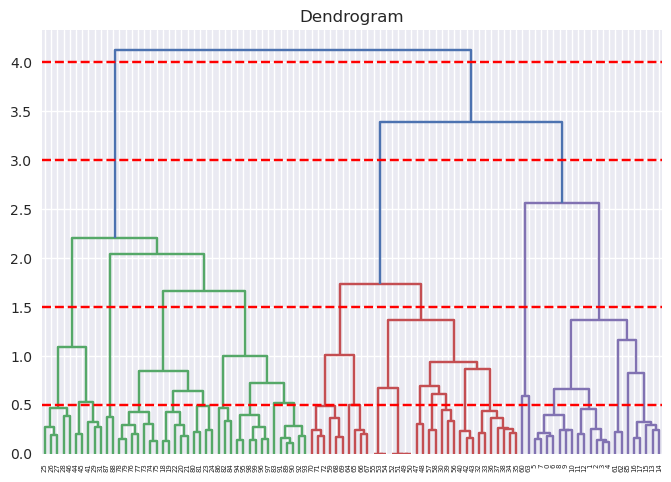

In [111]:
# Create linkage matrix
linkage_matrix = shc.linkage(sequence, method ='ward', metric="euclidean")

# Write your solution here
# 2
from scipy.cluster.hierarchy import fcluster
for threshold in [0.5, 1.5, 3.0, 4.0]:
    print(f"Number of clusters with a threshold of {threshold} is: {len(set(fcluster(linkage_matrix, threshold, criterion='distance')))}")

# 1
dn = dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=1.5, color='r', linestyle='--')
plt.axhline(y=3.0, color='r', linestyle='--')
plt.axhline(y=4.0, color='r', linestyle='--')
plt.show()



---
**Task 9 (easy): Fitting the agglomerative clustreing algorithm👩‍💻**
The cell below creates an instance of the `AgglomerativeClustering()`
 class. The [documentation on agglomerative clustering is given here.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

1. Select the distance threshold that results in 3 clusters, then apply agglomerative clustering on the sequence. 
2. Extract the cluster labels for each pose in the sequence.
3. Visualize the pose sequence by assigning a distinct color to each pose based on its cluster.


---

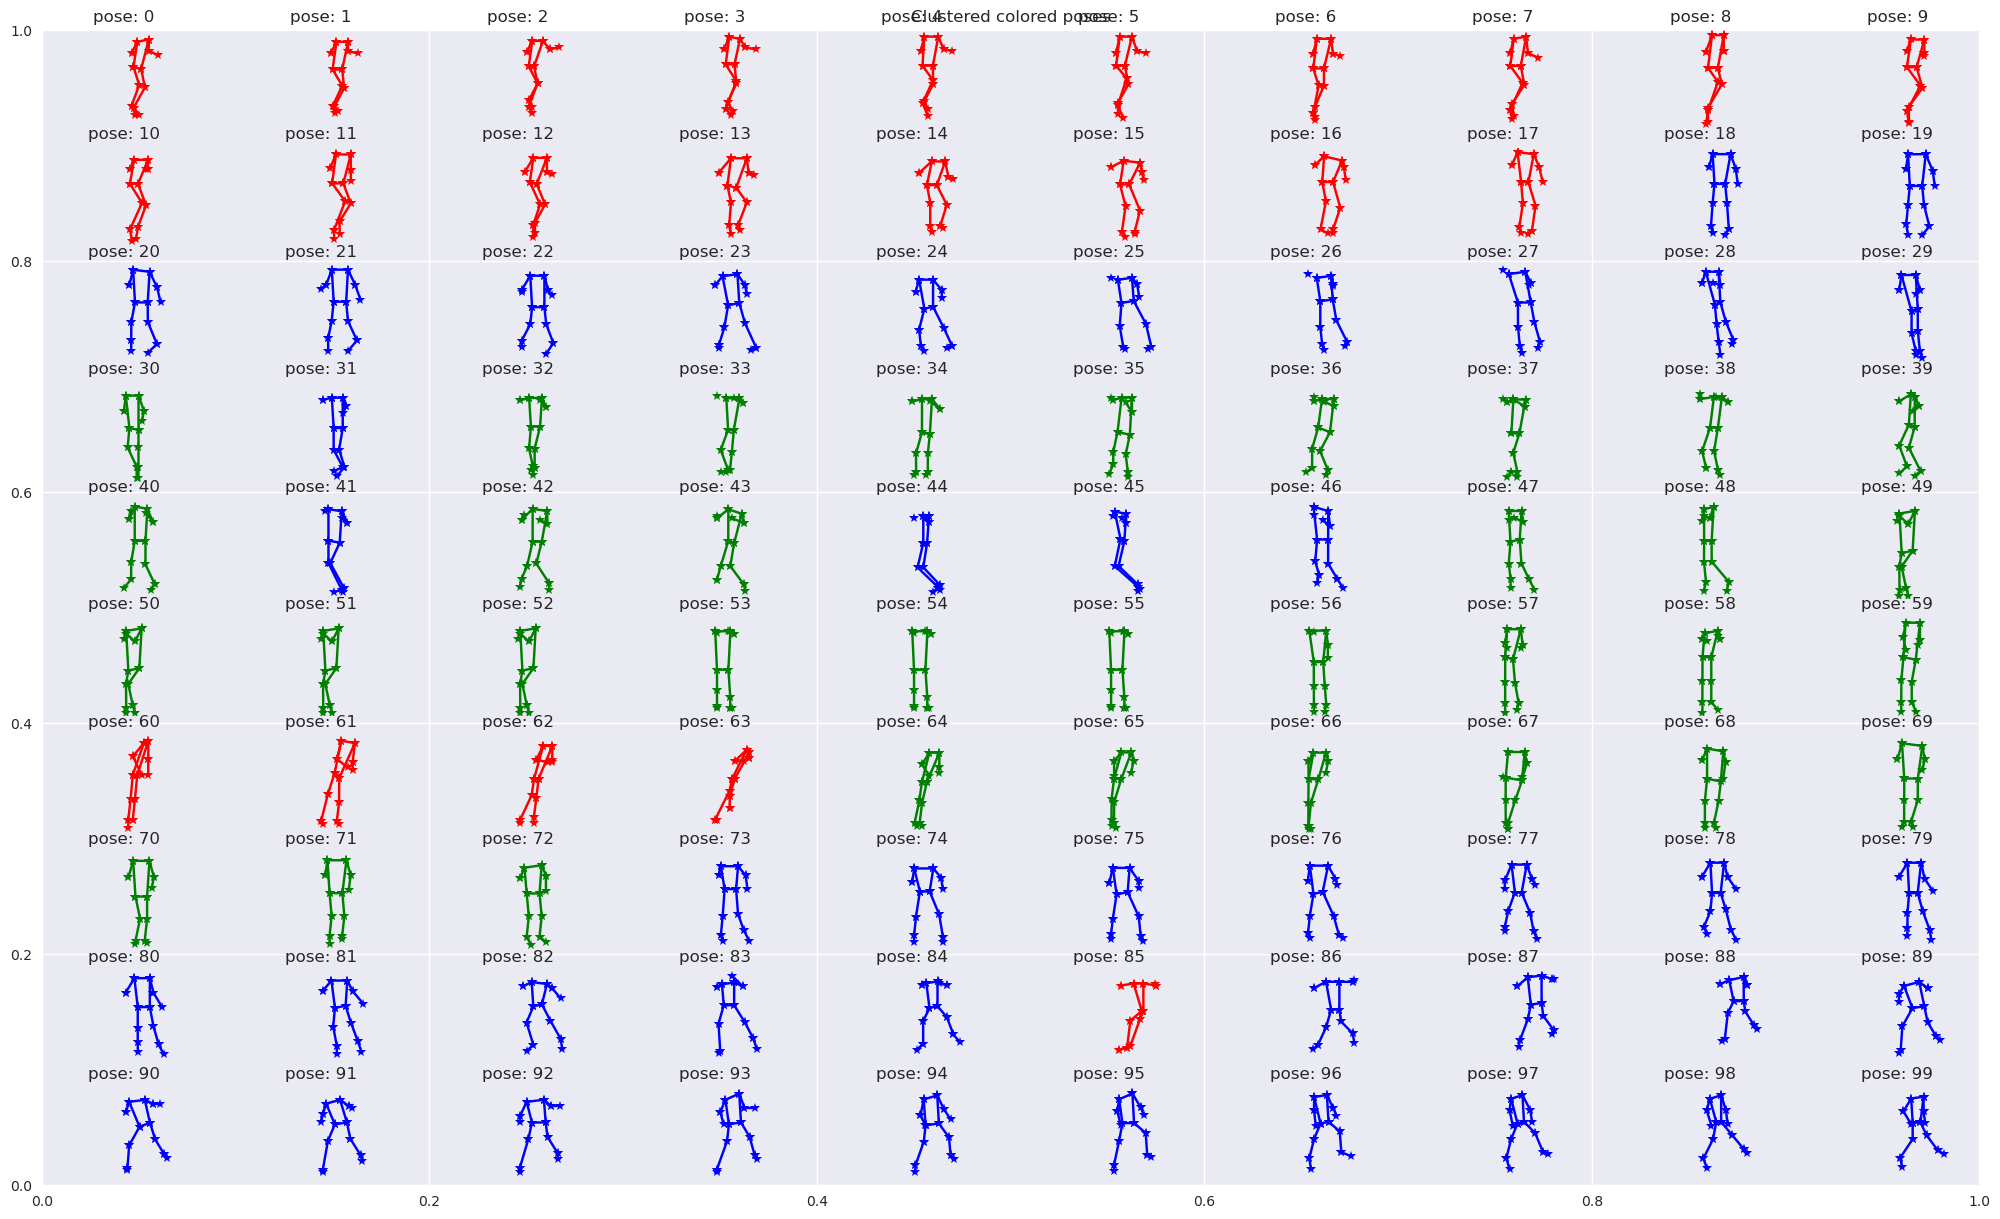

In [113]:
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Write your solution here (agglomerative clustering and cluster centers)
agg_clustering_model = agg_clustering.fit(sequence)

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(25,15))
plt.title('Clustered colored poses')
for i in range(len(agg_clustering_model.labels_)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[agg_clustering_model.labels_[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.title(f'pose: {i}')
    plt.axis('off')

plt.show()


---
**Task 10 (medium): Cluster centers👩‍💻💡**
1. The `AgglomerativeClustering()`
 class does not have an attribute or a method for directly extracting clusters. Calculate the mean pose within each cluster and plot it.
2. Compare the graphs visualizing the cluster centers for all of the clustering methods implemented so far. Do you see any similarities between them? 
3. Why could the methods lead to similar clusters? What are the main reasons behind the differences in the cluster labels?
4. (optional) Change the distance metric (try `l1`
 and `cosine`
) and repeat the previous two tasks (task 8 and 9). What differences do you observe, and can you explain why these differences occur? Does a different distance metric result in more meaningful clusters?


---

1. See the code
2. If we look at the 3 poses returned by all the methodologies they're essentially all the same (colors may vary due to different numbering)
3. They all have some sort of "underlying" grouping, no matter the methods some points are close to each other. The differences is often in the edge cases, data points that are in between two or more clusters

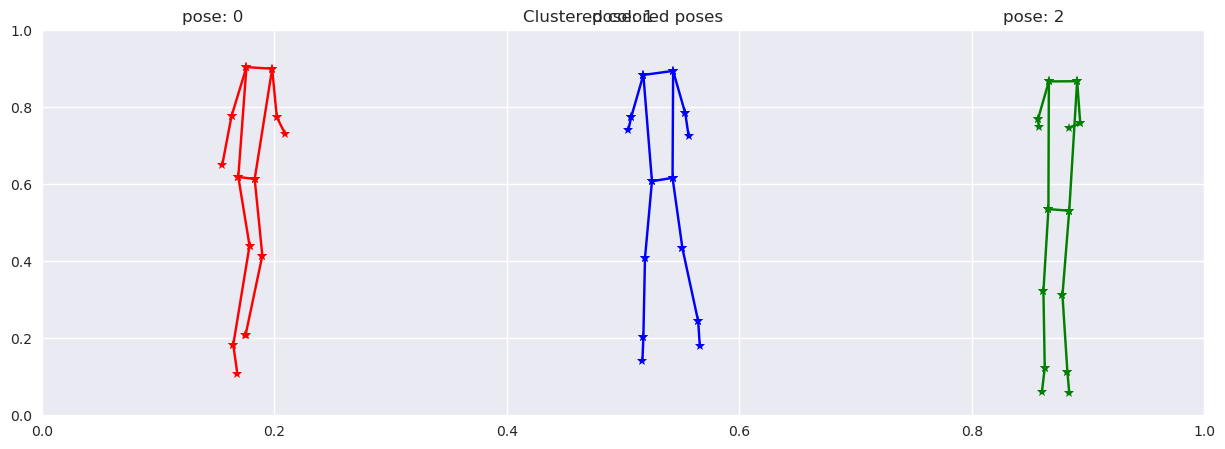

In [129]:
# Write your solution here
agg_mean_poses = [[], [], []]
for i in range(len(agg_clustering_model.labels_)):
    agg_mean_poses[agg_clustering_model.labels_[i]].append(sequence[i])

for i in range(len(agg_mean_poses)):
    agg_mean_poses[i] = np.mean(agg_mean_poses[i], axis=0)

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15,5))
plt.title('Clustered colored poses')
for i in range(len(agg_mean_poses)):
    plt.subplot(1, 3, i + 1)
    plot_single_pose(agg_mean_poses[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)
    plt.title(f'pose: {i}')
    plt.axis('off')
